# Disease Prediction Analysis

This notebook performs analysis on a disease-related dataset, covering data cleaning, exploratory analysis, feature engineering, model development, and deployment preparation.

## 1. Dataset Exploration and Initial Analysis

First, let's load the dataset and get a preliminary understanding of its structure and content.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('lcs_synthetic_20000.csv')

# Display the first few rows
print('First 5 rows of the dataset:')
print(df.head())

# Check data types
print('\nData types of each column:')
print(df.info())

# Get a summary of the dataset
print('\nSummary statistics of numerical columns:')
print(df.describe())

# Check for missing values
print('\nMissing values per column:')
print(df.isnull().sum())

# Check for duplicate rows
print('\nNumber of duplicate rows:')
print(df.duplicated().sum())


First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        2               1        1              2   
1      M   71        2               2        1              1   
2      M   61        2               1        1              2   
3      M   55        2               2        1              2   
4      F   56        2               1        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         1                  2         2   
1                2         1         2         2                  1         1   
2                2         1         2         2                  1         1   
3                1         1         1         2                  2         1   
4                1         2         2         2                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0              

## 2. Data Cleaning and Quality Assessment

Based on the initial analysis, there are no missing values in the dataset. However, there are duplicate rows. We will remove these duplicate rows to ensure data quality.

### Handling Duplicates


In [2]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

# Convert 'GENDER' to numerical (M=1, F=0)
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})

# Convert 'LUNG_CANCER' to numerical (YES=1, NO=0)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

print('\nFirst 5 rows after data cleaning: ')
print(df.head())

print('\nData types after cleaning:')
print(df.info())


Number of rows after removing duplicates: 19571

First 5 rows after data cleaning: 
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        2               1        1              2   
1       1   71        2               2        1              1   
2       1   61        2               1        1              2   
3       1   55        2               2        1              2   
4       0   56        2               1        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         1                  2         2   
1                2         1         2         2                  1         1   
2                2         1         2         2                  1         1   
3                1         1         1         2                  2         1   
4                1         2         2         2                  2         1   

   SHORTNESS OF BREATH  SW

## 3. Exploratory Data Analysis and Visualization

In this section, we will perform exploratory data analysis to understand the distributions of individual variables and the relationships between them. We will create various visualizations to gain insights into the dataset.

### Univariate Analysis


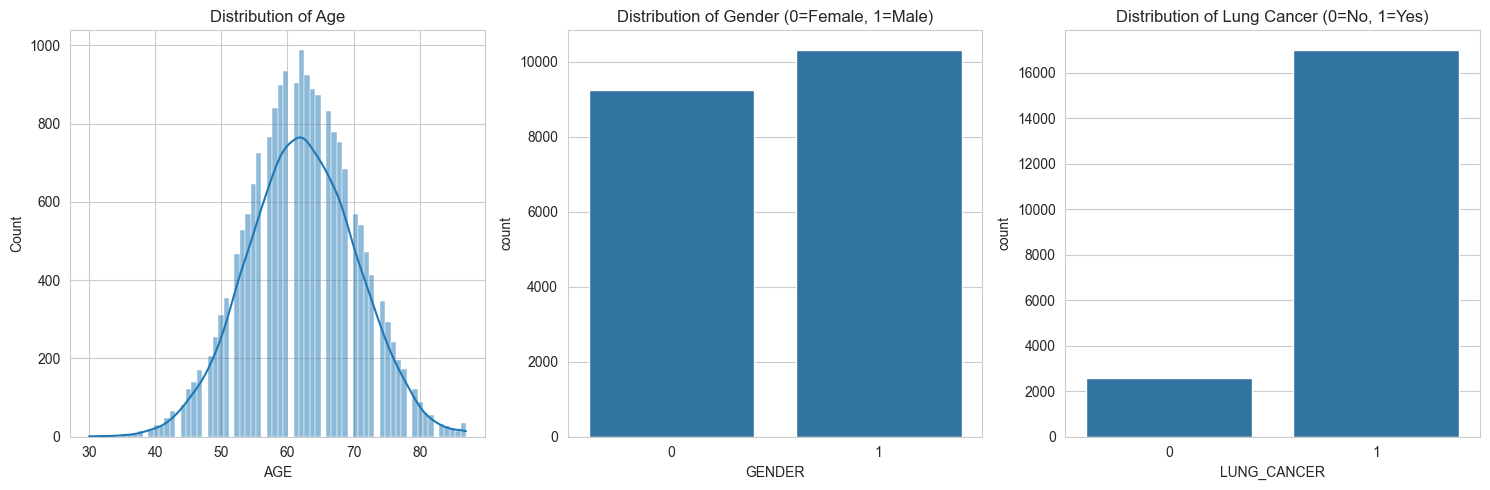

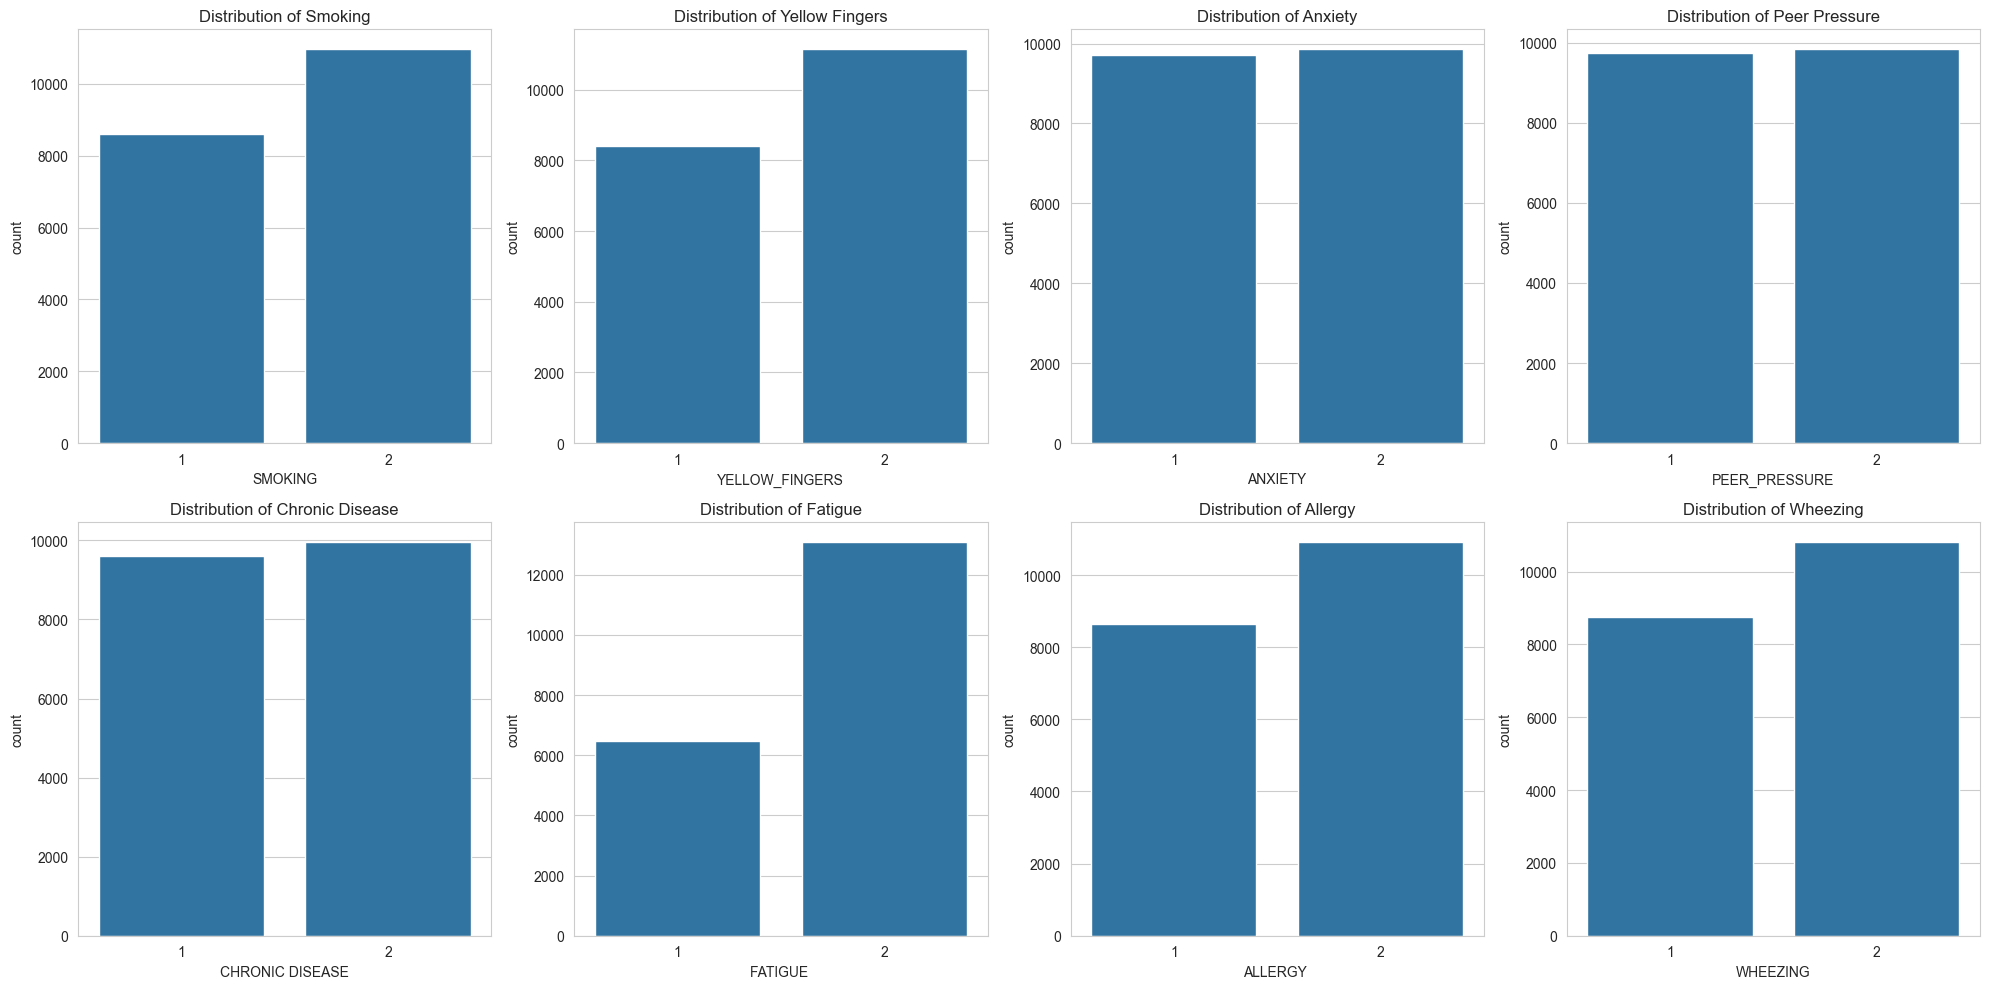

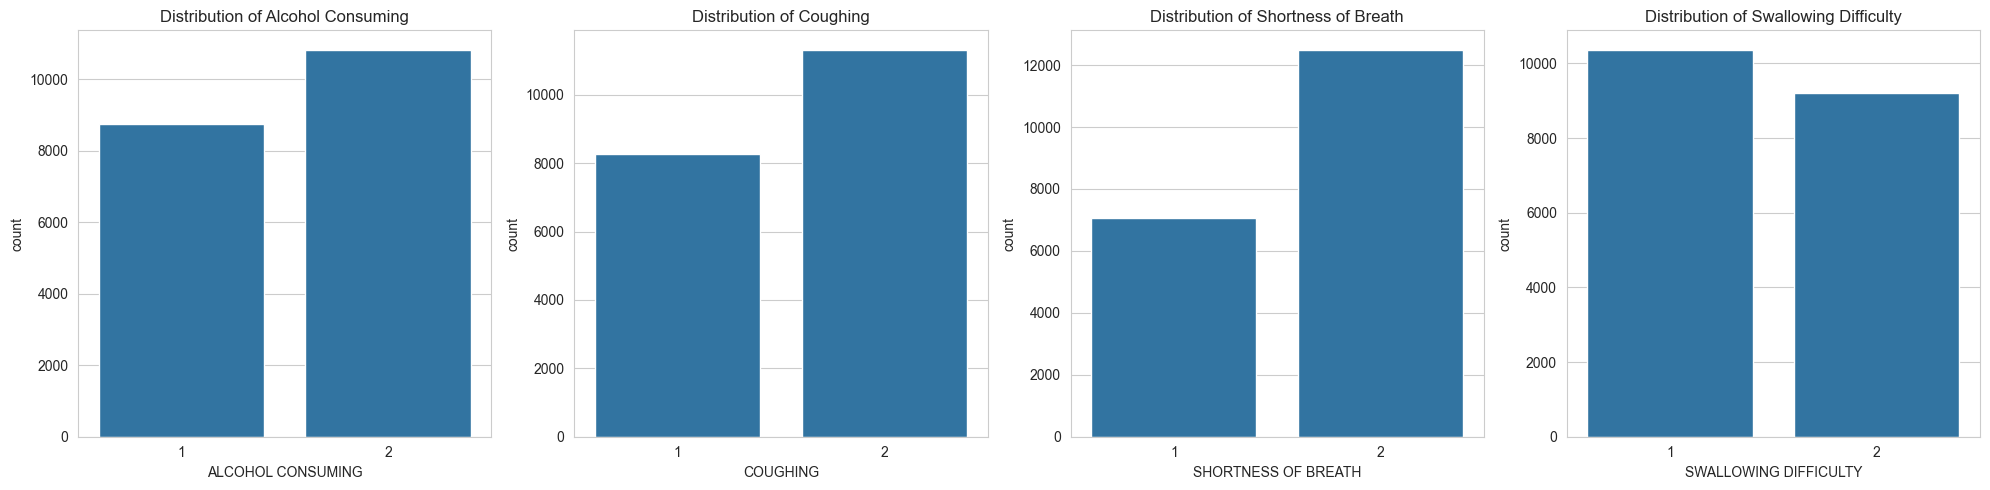

Univariate analysis complete.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Univariate Analysis - Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df["AGE"], kde=True)
plt.title("Distribution of Age")

plt.subplot(1, 3, 2)
sns.countplot(x="GENDER", data=df)
plt.title("Distribution of Gender (0=Female, 1=Male)")

plt.subplot(1, 3, 3)
sns.countplot(x="LUNG_CANCER", data=df)
plt.title("Distribution of Lung Cancer (0=No, 1=Yes)")
plt.tight_layout()
plt.show()

# Univariate Analysis - Count plots for other binary/categorical features
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.countplot(x="SMOKING", data=df)
plt.title("Distribution of Smoking")

plt.subplot(2, 4, 2)
sns.countplot(x="YELLOW_FINGERS", data=df)
plt.title("Distribution of Yellow Fingers")

plt.subplot(2, 4, 3)
sns.countplot(x="ANXIETY", data=df)
plt.title("Distribution of Anxiety")

plt.subplot(2, 4, 4)
sns.countplot(x="PEER_PRESSURE", data=df)
plt.title("Distribution of Peer Pressure")

plt.subplot(2, 4, 5)
sns.countplot(x="CHRONIC DISEASE", data=df)
plt.title("Distribution of Chronic Disease")

plt.subplot(2, 4, 6)
sns.countplot(x="FATIGUE ", data=df)
plt.title("Distribution of Fatigue")

plt.subplot(2, 4, 7)
sns.countplot(x="ALLERGY ", data=df)
plt.title("Distribution of Allergy")

plt.subplot(2, 4, 8)
sns.countplot(x="WHEEZING", data=df)
plt.title("Distribution of Wheezing")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
sns.countplot(x="ALCOHOL CONSUMING", data=df)
plt.title("Distribution of Alcohol Consuming")

plt.subplot(1, 4, 2)
sns.countplot(x="COUGHING", data=df)
plt.title("Distribution of Coughing")

plt.subplot(1, 4, 3)
sns.countplot(x="SHORTNESS OF BREATH", data=df)
plt.title("Distribution of Shortness of Breath")

plt.subplot(1, 4, 4)
sns.countplot(x="SWALLOWING DIFFICULTY", data=df)
plt.title("Distribution of Swallowing Difficulty")
plt.tight_layout()
plt.show()

print("Univariate analysis complete.")


### Bivariate Analysis

Let's explore the relationships between features and the target variable (`LUNG_CANCER`), as well as relationships between features themselves.


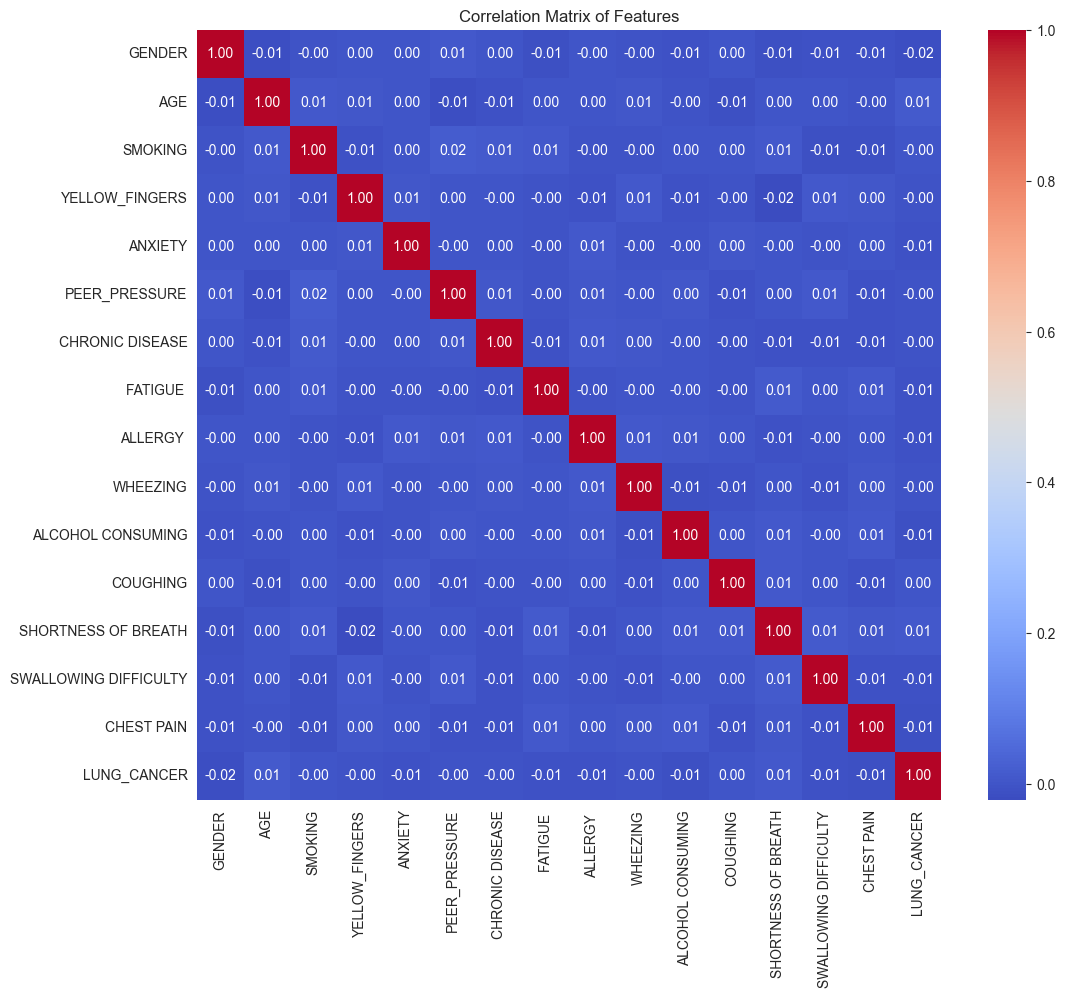

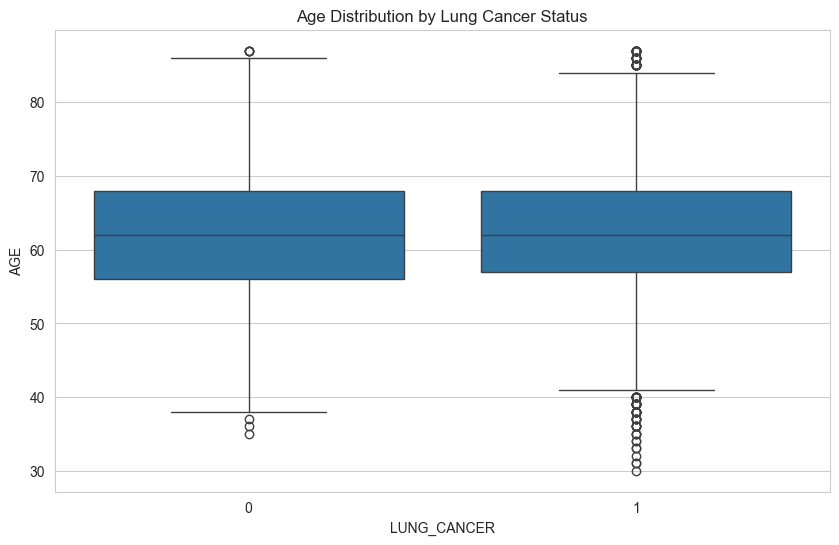

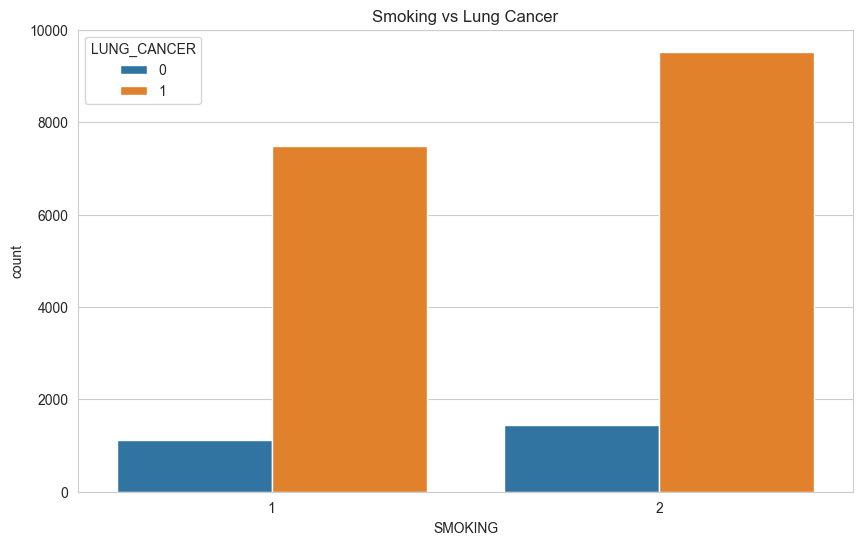

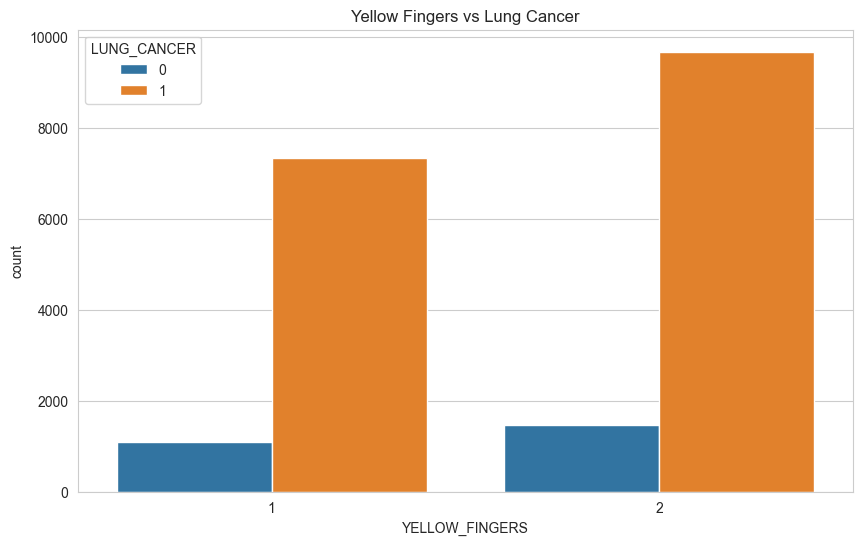

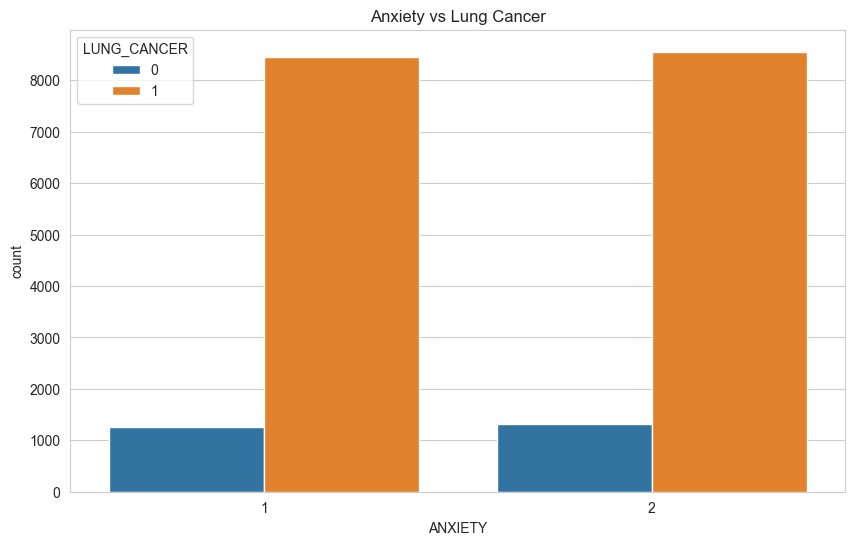

Bivariate analysis complete.


In [4]:
# Bivariate Analysis - Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Bivariate Analysis - Relationship with LUNG_CANCER
# Age vs LUNG_CANCER (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="LUNG_CANCER", y="AGE", data=df)
plt.title("Age Distribution by Lung Cancer Status")
plt.show()

# Smoking vs LUNG_CANCER (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x="SMOKING", hue="LUNG_CANCER", data=df)
plt.title("Smoking vs Lung Cancer")
plt.show()

# Yellow Fingers vs LUNG_CANCER (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x="YELLOW_FINGERS", hue="LUNG_CANCER", data=df)
plt.title("Yellow Fingers vs Lung Cancer")
plt.show()

# Anxiety vs LUNG_CANCER (Countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x="ANXIETY", hue="LUNG_CANCER", data=df)
plt.title("Anxiety vs Lung Cancer")
plt.show()

print("Bivariate analysis complete.")


## 4. Feature Engineering and Selection

In this section, we will create a new feature and perform feature selection to prepare the data for model development.

### Feature Engineering

We will create an interaction term between "AGE" and "SMOKING" to capture potential combined effects on lung cancer.


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create a new feature: AGE_SMOKING_INTERACTION
df["AGE_SMOKING_INTERACTION"] = df["AGE"] * df["SMOKING"]
print("New feature 'AGE_SMOKING_INTERACTION' created.")

# Define features (X) and target (y)
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# Feature Selection using SelectKBest with f_classif
# Select top 10 features
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask]

print(f"\nOriginal number of features: {X.shape[1]}")
print(f"Selected number of features: {X_new.shape[1]}")
print("Selected features:")
print(selected_features.tolist())

# Update the DataFrame with selected features for subsequent steps
df_selected = df[selected_features.tolist() + ["LUNG_CANCER"]]
print("\nDataFrame updated with selected features.")
print(df_selected.head())


New feature 'AGE_SMOKING_INTERACTION' created.

Original number of features: 16
Selected number of features: 10
Selected features:
['GENDER', 'AGE', 'ANXIETY', 'FATIGUE ', 'ALLERGY ', 'ALCOHOL CONSUMING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'AGE_SMOKING_INTERACTION']

DataFrame updated with selected features.
   GENDER  AGE  ANXIETY  FATIGUE   ALLERGY   ALCOHOL CONSUMING  \
0       1   69        1         2         1                  2   
1       1   71        1         1         2                  1   
2       1   61        1         1         2                  1   
3       1   55        1         1         1                  2   
4       0   56        1         2         2                  2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0                    2                      1           1   
1                    2                      2           1   
2                    2                      2           2   
3                    2

## 5. Model Development and Evaluation

In this section, we will develop and evaluate machine learning models. We will compare at least three different algorithms, perform hyperparameter tuning using GridSearchCV, and track precision and recall.

### Data Splitting


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y) from the selected DataFrame
X = df_selected.drop("LUNG_CANCER", axis=1)
y = df_selected["LUNG_CANCER"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split into training and testing sets.
X_train shape: (15656, 10)
X_test shape: (3915, 10)
y_train shape: (15656,)
y_test shape: (3915,)


### Model Training and Evaluation

We will compare three machine learning algorithms: Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier. We will use GridSearchCV for hyperparameter tuning and evaluate models based on precision and recall.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
}

results = {}

for name, model in models.items():
    print(f"\n--- Training and Tuning {name} ---")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[name] = {
        'best_params': grid_search.best_params_,
        'precision': precision,
        'recall': recall,
        'classification_report': classification_report(y_test, y_pred)
    }
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Precision for {name}: {precision:.3f}")
    print(f"Recall for {name}: {recall:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

# Select the best model based on a combined metric (e.g., F1-score or simply precision/recall targets)
# For this task, we prioritize models that meet both precision and recall >= 0.3
best_overall_model = None
best_overall_score = -1

print("\n--- Model Comparison ---")
for name, metrics in results.items():
    print(f"\n{name}:\n  Precision: {metrics['precision']:.3f}\n  Recall: {metrics['recall']:.3f}")
    
    if metrics['precision'] >= 0.3 and metrics['recall'] >= 0.3:
        # Simple scoring: sum of precision and recall if both conditions met
        current_score = metrics['precision'] + metrics['recall']
        if current_score > best_overall_score:
            best_overall_score = current_score
            best_overall_model = name

print(f"\nBest overall model (meeting precision/recall >= 0.3 criteria): {best_overall_model}")

# Save the best model and scaler
import pickle

final_model = models[best_overall_model]
final_model.set_params(**results[best_overall_model]['best_params'])
final_model.fit(X_train_scaled, y_train)

with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nFinal model and scaler saved as final_model.pkl and scaler.pkl")



--- Training and Tuning Logistic Regression ---
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Precision for Logistic Regression: 0.869
Recall for Logistic Regression: 1.000
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.87      1.00      0.93      3403

    accuracy                           0.87      3915
   macro avg       0.43      0.50      0.47      3915
weighted avg       0.76      0.87      0.81      3915


--- Training and Tuning Random Forest ---
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Precision for Random Forest: 0.869
Recall for Random Forest: 0.999
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.87      1.00      0.93      3403

    accuracy                      